In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import re
from nltk.tokenize import RegexpTokenizer
import numpy as np

In [24]:
%%time

df = pd.read_csv('/content/drive/My Drive/code_blocks.csv', sep='\t', delimiter='\t',
                 encoding='utf-8', error_bad_lines=False, engine='python')

CPU times: user 4.08 s, sys: 162 ms, total: 4.24 s
Wall time: 5.19 s


In [25]:
print(df.shape)

(213535, 2)


**Tokenization Type 1**

In [0]:
# %%time

# tokenizer = RegexpTokenizer(r'\w+|\$[\d\.]+|\S+')

# df['code_block'] = df['code_block'].apply(lambda x: tokenizer.tokenize(x))

In [0]:
tokens_io = ['read', 'csv' , 'sql' , 'json' , 'png' , 'jpg' ,
          'tsv' , 'write' , 'open' , 'print' , 'output' ,
          'stdin' , 'stdout' , 'path' , 'dir']
tokens_vis = ['plot', 'hist', 'sns.', 'plt.', 'histogram',
                        'chart', 'diagram', 'graph', 'draw', 'plotline']

In [0]:
def tokens_search(df, tokens, new_column_name):
    df[new_column_name] = 0
    for i in range(len(df)):
        percents = str(round(100*i/len(df),1))
        print(percents + '%\r', end='')
        for token in tokens:
            if token in df['code_block'][i]:
                df[new_column_name][i] = 1
                break
    return df

In [29]:
%%time

df = tokens_search(df, tokens_io, 'tag_io')
print(len(df))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


213535
CPU times: user 1min 25s, sys: 11.5 s, total: 1min 36s
Wall time: 1min 23s


In [30]:
df['tag_io'].value_counts()

0    151314
1     62221
Name: tag_io, dtype: int64

In [31]:
%%time

df = tokens_search(df, tokens_vis, 'tag_vis')
print(len(df))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


213535
CPU times: user 1min 8s, sys: 11.4 s, total: 1min 19s
Wall time: 1min 6s


In [32]:
df['tag_vis'].value_counts()

0    157578
1     55957
Name: tag_vis, dtype: int64

**SVM**

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

%matplotlib inline

In [0]:
X = df['code_block']
y = df['tag_io']

In [0]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [0]:
# grid = {"C": np.power(10.0, np.arange(-5, 6))}
# cv = KFold(n_splits=5, shuffle=True, random_state=241)
# model = SVC(kernel="linear", random_state=241)
# gs = GridSearchCV(model, grid, scoring="accuracy", cv=cv, verbose=1, n_jobs=-1)

In [0]:
# %%time

# gs.fit(X_train, y_train.ravel())

# C = gs.best_params_.get('C')
# C

**LINEAR KERNEL**

In [39]:
%%time

model = SVC(C=10, kernel="linear", random_state=241)
model.fit(X_train, y_train.ravel()) 

CPU times: user 1h 32min 2s, sys: 89.8 ms, total: 1h 32min 2s
Wall time: 1h 32min 8s


In [0]:
from sklearn import metrics
import matplotlib.pyplot as plt

In [0]:
y_pred = model.predict(X_test)

In [0]:
# metrics.plot_precision_recall_curve(model, X, y)

In [0]:
# metrics.plot_confusion_matrix(model, X, y)

In [44]:
metrics.precision_score(y_test, y_pred)

0.9904709748083242

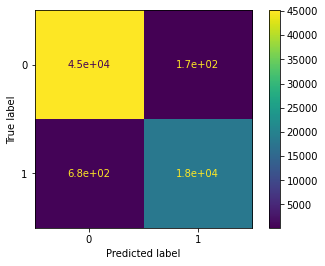

In [45]:
metrics.plot_confusion_matrix(model, X_test, y_test)

In [46]:
metrics.f1_score(y_test, y_pred)

0.977067070041328

**RBF KERNEL**

In [0]:
%%time

model = SVC(C=10, kernel="rbf", random_state=241)
model.fit(X_train, y_train.ravel()) 

In [0]:
from sklearn import metrics
import matplotlib.pyplot as plt

In [0]:
y_pred = model.predict(X_test)

In [0]:
metrics.precision_score(y_test, y_pred)

In [0]:
metrics.plot_confusion_matrix(model, X_test, y_test)

In [0]:
metrics.f1_score(y_test, y_pred)